# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Model CAPM as a simple linear regression

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero.
    stderr : float
        Standard error of the estimated gradient.
    
    See also
    --------
    :func:`scipy.optimize.curve_fit` : Use 

In [17]:
import pandas as pd

In [13]:
import pandas_datareader as web

In [14]:
spy_etf = web.DataReader('SPY','google')

In [21]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1897 entries, 2010-01-04 to 2017-07-18
Data columns (total 5 columns):
Open      1879 non-null float64
High      1879 non-null float64
Low       1879 non-null float64
Close     1897 non-null float64
Volume    1897 non-null int64
dtypes: float64(4), int64(1)
memory usage: 88.9 KB


In [22]:
spy_etf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,112.37,113.39,111.51,113.33,118944541
2010-01-05,113.26,113.68,112.85,113.63,111579866
2010-01-06,113.52,113.99,113.43,113.71,116074402
2010-01-07,113.50,114.33,113.18,114.19,131091048
2010-01-08,113.89,114.62,113.66,114.57,126402764


In [18]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [24]:
aapl = web.DataReader('AAPL','google',start,end)

In [27]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,30.49,30.64,30.34,30.57,123432050
2010-01-05,30.66,30.80,30.46,30.63,150476004
2010-01-06,30.63,30.75,30.11,30.14,138039594
2010-01-07,30.25,30.29,29.86,30.08,119282324
2010-01-08,30.04,30.29,29.87,30.28,111969081


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

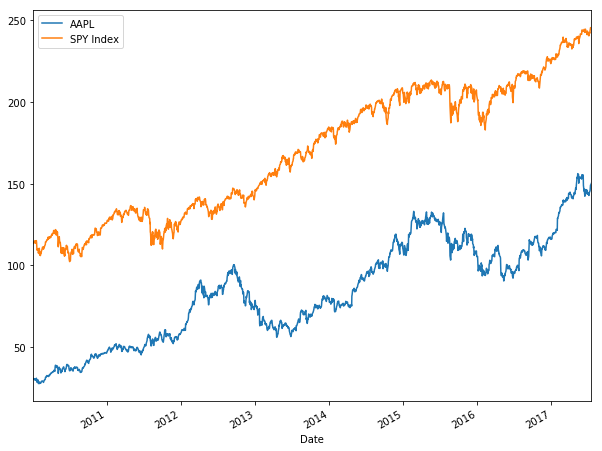

In [29]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [31]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

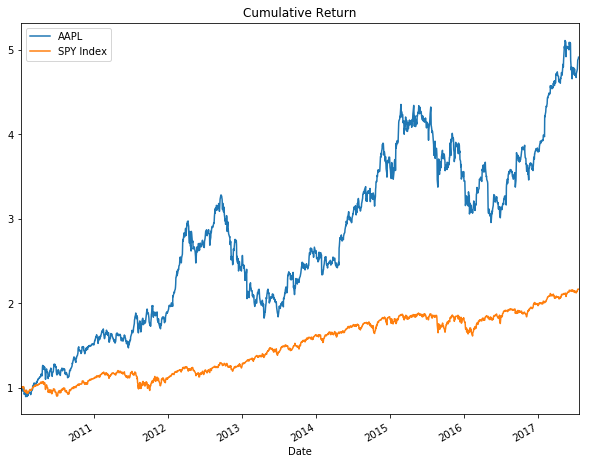

In [33]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [41]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

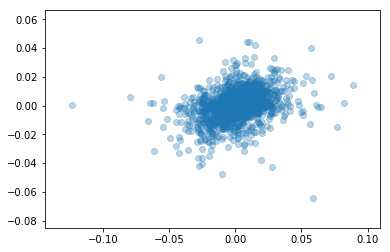

In [45]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

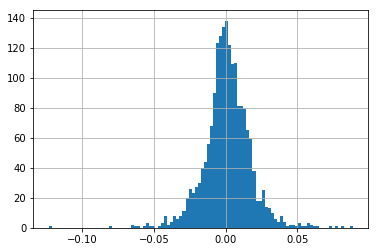

In [46]:
aapl['Daily Return'].hist(bins=100)

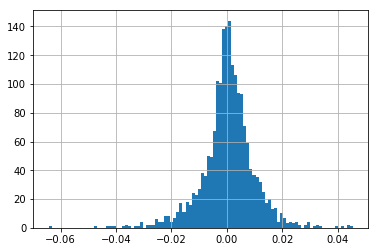

In [48]:
spy_etf['Daily Return'].hist(bins=100)

In [37]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [38]:
beta

0.19423150396392763

In [39]:
alpha

0.00026461336993233316

In [40]:
r_value

0.33143080741409325

## What if our stock was completely related to SP500?

In [49]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [50]:
import numpy as np

In [63]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [64]:
noise

array([ 0.00089285,  0.00056301, -0.00022182, ..., -0.00075069,
       -0.00017751, -0.00034175])

In [65]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2010-01-05    0.003540
2010-01-06    0.001267
2010-01-07    0.003999
2010-01-08    0.003744
2010-01-11    0.002430
2010-01-12   -0.008178
2010-01-13    0.006244
2010-01-14    0.003002
2010-01-15   -0.010593
2010-01-19    0.012289
2010-01-20   -0.010683
2010-01-21   -0.019239
2010-01-22   -0.022449
2010-01-25    0.003428
2010-01-26   -0.003510
2010-01-27    0.004741
2010-01-28   -0.011874
2010-01-29   -0.010649
2010-02-01    0.015995
2010-02-02    0.011317
2010-02-03   -0.006852
2010-02-04   -0.029828
2010-02-05    0.000845
2010-02-08   -0.007362
2010-02-09    0.010399
2010-02-10   -0.000745
2010-02-11    0.008745
2010-02-12   -0.001782
2010-02-16    0.016414
2010-02-17    0.003658
                ...   
2017-06-06   -0.001963
2017-06-07    0.003158
2017-06-08   -0.000087
2017-06-09   -0.000582
2017-06-12   -0.001564
2017-06-13    0.006079
2017-06-14   -0.002911
2017-06-15   -0.001163
2017-06-16   -0.004836
2017-06-19    0.008102
2017-06-20   -0.008464
2017-06-21   -0.000669
2017-0

In [66]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [67]:
beta

0.9902145894162997

In [68]:
alpha

1.4861814214210613e-05

Looks like our understanding is correct!